Done by, 

Aadi Mohammed (19BCI7052)

### import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os
import shutil
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
import random
import warnings
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.models import Sequential
from tensorflow import optimizers

In [ ]:
#remove warnings
warnings.filterwarnings("ignore")

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
 width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
 horizontal_flip=True, fill_mode='nearest')

test_datagen = ImageDataGenerator(
    rescale = 1/255
)

In [ ]:
training_iterator = train_datagen.flow_from_directory('/content/drive/MyDrive/DL_proj_dataset/train', batch_size=30, target_size=(224,224))
testing_iterator = test_datagen.flow_from_directory('/content/drive/MyDrive/DL_proj_dataset/test', batch_size=30, target_size=(224,224))

Found 1148 images belonging to 3 classes.
Found 286 images belonging to 3 classes.


# Review 2

### ResNet -50 implementaion with transfer learning

In [ ]:
#importing Libraries
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
 width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
 horizontal_flip=True, fill_mode='nearest')

test_datagen = ImageDataGenerator(
    rescale = 1/255
)

In [ ]:
from keras.layers import Input
model = ResNet50(include_top= False,input_shape=  (224,224,3))

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in model.layers:
  layer.trainable =False

In [ ]:
flatten_layer = layers.Flatten()(model.output)
flattened_fc_layer = layers.Dense(512, activation='relu')(flatten_layer)
flattened_fc_layer_2 = layers.Dense(1024, activation='relu')(flattened_fc_layer)
flattened_fc_softmax_layer = layers.Dense(3, activation='softmax')(flattened_fc_layer_2)

In [ ]:
model = Model(inputs = model.inputs, outputs = flattened_fc_softmax_layer)

In [ ]:
training_iterator = train_datagen.flow_from_directory('/content/drive/MyDrive/DL_proj_dataset/train', batch_size=30, target_size=(224,224))
testing_iterator = test_datagen.flow_from_directory('/content/drive/MyDrive/DL_proj_dataset/test', batch_size=30, target_size=(224,224))

Found 1148 images belonging to 3 classes.
Found 286 images belonging to 3 classes.


In [ ]:
training_iterator.class_indices

{'medicinal': 0, 'parasitic': 1, 'poisonous': 2}

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(training_iterator, validation_data = testing_iterator, epochs=10)

Epoch 1/10
39/39 [==============================] - 205s 5s/step - loss: 3.3407 - accuracy: 0.6768 - val_loss: 0.6339 - val_accuracy: 0.8881
Epoch 2/10
39/39 [==============================] - 48s 1s/step - loss: 0.3928 - accuracy: 0.8720 - val_loss: 0.2395 - val_accuracy: 0.9056
Epoch 3/10
39/39 [==============================] - 48s 1s/step - loss: 0.2782 - accuracy: 0.8902 - val_loss: 0.2562 - val_accuracy: 0.9056
Epoch 4/10
39/39 [==============================] - 47s 1s/step - loss: 0.2747 - accuracy: 0.8841 - val_loss: 0.1950 - val_accuracy: 0.9266
Epoch 5/10
39/39 [==============================] - 49s 1s/step - loss: 0.2245 - accuracy: 0.9016 - val_loss: 0.2421 - val_accuracy: 0.9091
Epoch 6/10
39/39 [==============================] - 50s 1s/step - loss: 0.2577 - accuracy: 0.8929 - val_loss: 0.2225 - val_accuracy: 0.8986
Epoch 7/10
39/39 [==============================] - 48s 1s/step - loss: 0.2706 - accuracy: 0.8929 - val_loss: 0.2799 - val_accuracy: 0.8846
Epoch 8/10
39/39 [=

In [ ]:
from tensorflow.keras.preprocessing import image 
import numpy as np
img= image.load_img("test-1.jpg",target_size=(224,224))
#Converting the test image from "PIL.Image.Image" format to "numpy.ndarray" format
x=image.img_to_array(img)
type(x)
#Increasing the no.of dimensions of the image array, so as to fit in the model.
x=np.expand_dims(x,axis=0)
x.shape
#Predicting the class of x
y_pred= np.argmax(model.predict(x))
y_pred

In [ ]:
model.save("model1.h5")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


# Review 3

### Image Generator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator (
        rescale= 1./255,
        rotation_range = 90,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        shear_range = 0.2,
        zoom_range = 0.2,
        brightness_range = [0.3, 1],
        horizontal_flip = True,
        vertical_flip = True,
        fill_mode = 'nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(IMG_SIZE, IMG_SIZE),  
        batch_size= BATCH_SIZE,
        class_mode='categorical')
    
val_datagen = ImageDataGenerator(rescale=1./255)

    
validation_generator = val_datagen.flow_from_directory(
    valid_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size= BATCH_SIZE,
    class_mode='categorical')

Found 1456 images belonging to 4 classes.
Found 365 images belonging to 4 classes.


### Display the different variations of image augmentation

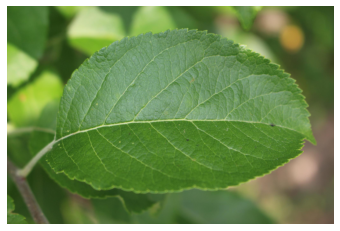

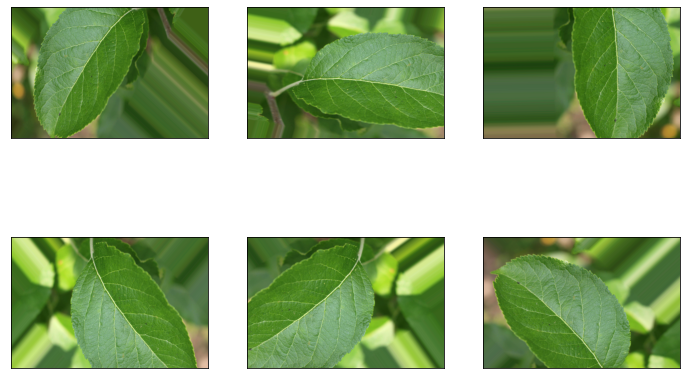

In [ ]:
#Let's first take a look at an image and see how data generator augment the images
example_img = os.path.join(img_folder, random.choice(os.listdir(img_folder)))
example_img = load_img(example_img)
plt.axis('off')
plt.imshow(example_img)
arr = img_to_array(example_img)
arr = arr.reshape((1,) + arr.shape) 

example_gen = ImageDataGenerator (
    rotation_range = 90,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    brightness_range = [0.2, 0.5],
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest'
)

i = 0

fig = plt.figure(figsize= (12,12))

for batch in example_gen.flow(arr, batch_size = 1):
    ax = fig.add_subplot(3, 3, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(array_to_img(batch[0]))
    i+=1
    if (i > 5):
        break;
plt.show()

## 1) BASE model

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'accuracy', patience = 5, restore_best_weights = True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath= "optimal_weights.h5",
    save_best_only=True)

history = CNN.fit(
      train_generator,
      steps_per_epoch=  TRAIN_STEP_PER_EPOCH,
      epochs = NUM_EPOCHS,
      validation_data= validation_generator,
      validation_steps= VALID_STEP_PER_EPOCH, 
      callbacks = [early_stop, model_checkpoint],
      verbose=2)

2021-12-03 21:46:06.617618: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
45/45 - 97s - loss: 1.3006 - accuracy: 0.3532 - val_loss: 1.2018 - val_accuracy: 0.3438
Epoch 2/30
45/45 - 99s - loss: 1.2365 - accuracy: 0.3750 - val_loss: 1.1986 - val_accuracy: 0.4375
Epoch 3/30
45/45 - 91s - loss: 1.2259 - accuracy: 0.3954 - val_loss: 1.1697 - val_accuracy: 0.4773
Epoch 4/30
45/45 - 89s - loss: 1.1837 - accuracy: 0.4621 - val_loss: 1.0654 - val_accuracy: 0.5284
Epoch 5/30
45/45 - 87s - loss: 1.1428 - accuracy: 0.5126 - val_loss: 1.0624 - val_accuracy: 0.5795
Epoch 6/30
45/45 - 89s - loss: 1.0591 - accuracy: 0.5611 - val_loss: 1.0058 - val_accuracy: 0.5824
Epoch 7/30
45/45 - 92s - loss: 1.0100 - accuracy: 0.6018 - val_loss: 0.8855 - val_accuracy: 0.6562
Epoch 8/30
45/45 - 95s - loss: 0.9586 - accuracy: 0.6215 - val_loss: 0.9022 - val_accuracy: 0.6818
Epoch 9/30
45/45 - 96s - loss: 0.9230 - accuracy: 0.6500 - val_loss: 0.7644 - val_accuracy: 0.7017
Epoch 10/30
45/45 - 95s - loss: 0.8718 - accuracy: 0.6756 - val_loss: 0.8210 - val_accuracy: 0.6903
Epoch 11/

### Analyze Model Performance

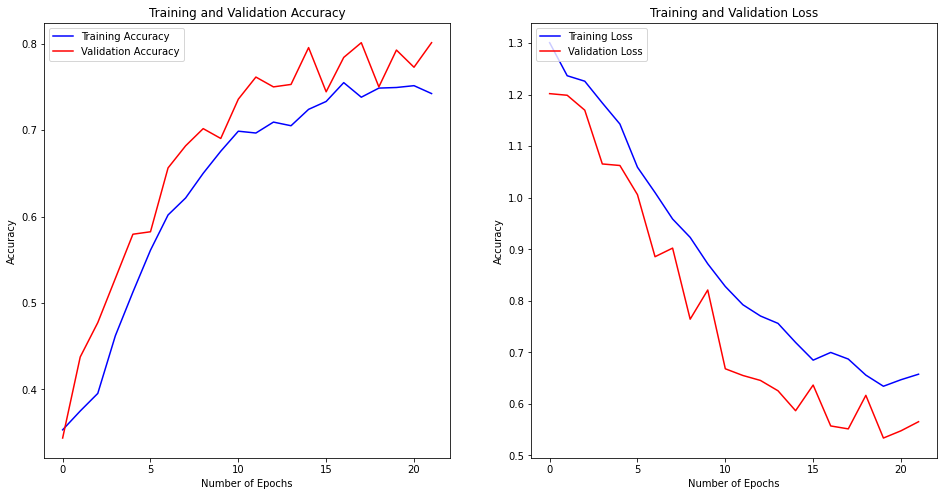

In [ ]:
acc = history.history['accuracy']

val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

_, (ax1, ax2) = plt.subplots(nrows = 1, ncols= 2, figsize=(16,8))

def performance_graph (ax, num_epochs, train_acc, valid_acc, position, _type):
    ax.plot(num_epochs, train_acc, '-b',label = 'Training ' + _type)
    ax.plot(num_epochs, valid_acc, '-r', label = 'Validation ' + _type)
    ax.legend(loc= position)
    ax.set_title('Training and Validation '+ _type)
    ax.set_xlabel('Number of Epochs')
    ax.set_ylabel('Accuracy')
    
# Get number of epochs
epochs = range(len(acc))
performance_graph(ax1, NUM_EPOCHS, acc, val_acc, position = 'upper left', _type= 'Accuracy')
performance_graph(ax2, NUM_EPOCHS, loss, val_loss, position= 'upper left', _type= 'Loss')

In [ ]:
from sklearn.metrics import classification_report

#validation generator:
    #Data on which to evaluate the loss and any model metrics at the end of each epoch. 
    #The model will not be trained on this data. 

validation_generator = val_datagen.flow_from_directory(
    valid_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size= BATCH_SIZE,
    class_mode='categorical', 
    shuffle= False) 
    #shuffle has to be false or else when we predict,
    #it will randomize the class label making prediction really low

y_pred = CNN.predict(validation_generator , VALID_STEP_PER_EPOCH)
y_pred = np.argmax(y_pred, axis=1)

Found 365 images belonging to 4 classes.


In [ ]:
print(classification_report(validation_generator.classes, y_pred, target_names=features))

                   precision    recall  f1-score   support

          healthy       0.74      0.61      0.67       111
multiple_diseases       0.00      0.00      0.00        14
             rust       0.88      0.96      0.92       111
             scab       0.71      0.84      0.77       129

         accuracy                           0.78       365
        macro avg       0.58      0.60      0.59       365
     weighted avg       0.74      0.78      0.76       365



### Make Predictions

In [ ]:
from keras_preprocessing import image
test_set = pd.read_csv("/content/drive/MyDrive/DA project/test.csv")
test_set

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4
...,...
1816,Test_1816
1817,Test_1817
1818,Test_1818
1819,Test_1819


In [ ]:
X_test = getTestSet(test_set)
# rescale images
X_test = np.vstack(X_test) / 255 

In [ ]:
y_pred = model.predict(X_test, batch_size = BATCH_SIZE)
pd.DataFrame(y_pred).apply(np.argmax, axis=1)

##2) Extending our model using pre-trained Models

In [ ]:
import inspect
from tqdm import tqdm
model_dictionary = {m[0]:m[1] for m in inspect.getmembers(tf.keras.applications, inspect.isfunction)}
model_dictionary

{'DenseNet121': <function keras.applications.densenet.DenseNet121(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)>,
 'DenseNet169': <function keras.applications.densenet.DenseNet169(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)>,
 'DenseNet201': <function keras.applications.densenet.DenseNet201(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)>,
 'EfficientNetB0': <function keras.applications.efficientnet.EfficientNetB0(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000, classifier_activation='softmax', **kwargs)>,
 'EfficientNetB1': <function keras.applications.efficientnet.EfficientNetB1(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000, classifier_activation='softmax', **kwargs)>,
 'EfficientNetB2': <function keras.appl

In [ ]:
model_benchmarks = {'model_name': [], 'num_model_params': [], 'validation_accuracy': []}

#Use different pre-trained models to see which one has the highest accuracy
for model_name, model in tqdm(model_dictionary.items()):
    #"NASNetLarge" requires different images size (331,331) but we only want 224
    if 'NASNetLarge' in model_name:
        continue
    else:
        input_shape=(224,224,3)
        
    # load the pre-trained model and freeze the model weights
    pre_trained_model = model(include_top=False, pooling='max', input_shape=input_shape)
    pre_trained_model.trainable = False
    
    clf_model = tf.keras.models.Sequential()
    clf_model.add(pre_trained_model)
    clf_model.add(tf.keras.layers.Dense(4, activation='softmax'))
    clf_model.compile(loss='categorical_crossentropy', metrics=['accuracy'])    

  
    history = clf_model.fit(
      train_generator,
      steps_per_epoch= TRAIN_STEP_PER_EPOCH ,
      epochs=2,
      validation_data=validation_generator,
      validation_steps= VALID_STEP_PER_EPOCH,
      verbose=2)

    # Calculate all relevant metrics
    model_benchmarks['model_name'].append(model_name)
    model_benchmarks['num_model_params'].append(pre_trained_model.count_params())
    model_benchmarks['validation_accuracy'].append(history.history['val_accuracy'][-1])
    print(model_name)


  0%|                                                    | 0/28 [00:00<?, ?it/s]

Epoch 1/2
45/45 - 171s - loss: 1.8331 - accuracy: 0.4143 - val_loss: 1.3404 - val_accuracy: 0.5170
Epoch 2/2
45/45 - 164s - loss: 1.3933 - accuracy: 0.5281 - val_loss: 1.0896 - val_accuracy: 0.5994


  4%|█▍                                       | 1/28 [05:40<2:33:02, 340.11s/it]

DenseNet121
Epoch 1/2
45/45 - 198s - loss: 1.9803 - accuracy: 0.3834 - val_loss: 1.1019 - val_accuracy: 0.5795
Epoch 2/2
45/45 - 191s - loss: 1.3877 - accuracy: 0.5112 - val_loss: 0.8811 - val_accuracy: 0.6506


  7%|██▉                                      | 2/28 [12:14<2:41:14, 372.09s/it]

DenseNet169
Epoch 1/2
45/45 - 256s - loss: 1.7120 - accuracy: 0.4199 - val_loss: 1.1229 - val_accuracy: 0.5653
Epoch 2/2
45/45 - 250s - loss: 1.2881 - accuracy: 0.5463 - val_loss: 0.8123 - val_accuracy: 0.7131


 11%|████▍                                    | 3/28 [20:46<3:01:38, 435.95s/it]

DenseNet201
Epoch 1/2
45/45 - 104s - loss: 4.2209 - accuracy: 0.3188 - val_loss: 2.6706 - val_accuracy: 0.3295
Epoch 2/2
45/45 - 101s - loss: 3.5034 - accuracy: 0.3041 - val_loss: 2.1755 - val_accuracy: 0.3295


 14%|█████▊                                   | 4/28 [24:15<2:18:35, 346.49s/it]

EfficientNetB0
Epoch 1/2
45/45 - 118s - loss: 4.9747 - accuracy: 0.2935 - val_loss: 4.6999 - val_accuracy: 0.3153
Epoch 2/2
45/45 - 111s - loss: 4.1632 - accuracy: 0.3153 - val_loss: 2.3253 - val_accuracy: 0.3295


 18%|███████▎                                 | 5/28 [28:08<1:57:02, 305.33s/it]

EfficientNetB1
Epoch 1/2
45/45 - 123s - loss: 8.4591 - accuracy: 0.2985 - val_loss: 9.4018 - val_accuracy: 0.3153
Epoch 2/2
45/45 - 112s - loss: 6.9618 - accuracy: 0.3041 - val_loss: 6.0283 - val_accuracy: 0.3153


 21%|████████▊                                | 6/28 [32:06<1:43:38, 282.67s/it]

EfficientNetB2
Epoch 1/2
45/45 - 139s - loss: 3.0568 - accuracy: 0.3027 - val_loss: 2.4273 - val_accuracy: 0.3153
Epoch 2/2
45/45 - 131s - loss: 2.7137 - accuracy: 0.3041 - val_loss: 2.1817 - val_accuracy: 0.3153


 25%|██████████▎                              | 7/28 [36:41<1:37:57, 279.87s/it]

EfficientNetB3
Epoch 1/2
45/45 - 169s - loss: 6.1364 - accuracy: 0.3174 - val_loss: 4.0695 - val_accuracy: 0.3295
Epoch 2/2
45/45 - 158s - loss: 5.1575 - accuracy: 0.2879 - val_loss: 5.4285 - val_accuracy: 0.3295


 29%|███████████▋                             | 8/28 [42:14<1:38:56, 296.81s/it]

EfficientNetB4
Epoch 1/2
45/45 - 224s - loss: 13.1340 - accuracy: 0.2914 - val_loss: 2.4863 - val_accuracy: 0.3153
Epoch 2/2
45/45 - 213s - loss: 9.2369 - accuracy: 0.3202 - val_loss: 4.5143 - val_accuracy: 0.3295


 32%|█████████████▏                           | 9/28 [49:37<1:48:28, 342.53s/it]

EfficientNetB5
Epoch 1/2
45/45 - 280s - loss: 14.4722 - accuracy: 0.2999 - val_loss: 7.5927 - val_accuracy: 0.0398
Epoch 2/2
45/45 - 268s - loss: 11.3280 - accuracy: 0.2956 - val_loss: 9.1528 - val_accuracy: 0.3153


 36%|██████████████▎                         | 10/28 [58:52<2:02:25, 408.10s/it]

EfficientNetB6
Epoch 1/2
45/45 - 379s - loss: 11.4807 - accuracy: 0.3216 - val_loss: 9.2304 - val_accuracy: 0.3295
Epoch 2/2
45/45 - 365s - loss: 9.5079 - accuracy: 0.2935 - val_loss: 7.0209 - val_accuracy: 0.3295


 39%|██████████████▉                       | 11/28 [1:11:25<2:25:35, 513.85s/it]

EfficientNetB7
Epoch 1/2
45/45 - 219s - loss: 2.5898 - accuracy: 0.3357 - val_loss: 1.2895 - val_accuracy: 0.4886
Epoch 2/2
45/45 - 203s - loss: 1.8125 - accuracy: 0.4480 - val_loss: 2.1839 - val_accuracy: 0.4545


 43%|████████████████▎                     | 12/28 [1:18:35<2:10:14, 488.42s/it]

InceptionResNetV2
Epoch 1/2
45/45 - 127s - loss: 2.6624 - accuracy: 0.3785 - val_loss: 1.3272 - val_accuracy: 0.5341
Epoch 2/2
45/45 - 123s - loss: 2.0169 - accuracy: 0.4459 - val_loss: 2.0696 - val_accuracy: 0.4318


 46%|█████████████████▋                    | 13/28 [1:22:50<1:44:22, 417.47s/it]

InceptionV3
Epoch 1/2
45/45 - 96s - loss: 3.1876 - accuracy: 0.3926 - val_loss: 1.7287 - val_accuracy: 0.5142
Epoch 2/2
45/45 - 92s - loss: 2.1666 - accuracy: 0.4986 - val_loss: 1.8760 - val_accuracy: 0.5881


 50%|███████████████████                   | 14/28 [1:26:00<1:21:24, 348.89s/it]

MobileNet
Epoch 1/2
45/45 - 92s - loss: 2.9763 - accuracy: 0.3890 - val_loss: 1.3927 - val_accuracy: 0.5767
Epoch 2/2
45/45 - 91s - loss: 1.9242 - accuracy: 0.5218 - val_loss: 2.5065 - val_accuracy: 0.4574


 54%|████████████████████▎                 | 15/28 [1:29:05<1:04:53, 299.48s/it]

MobileNetV2
Epoch 1/2
45/45 - 93s - loss: 1.2962 - accuracy: 0.3272 - val_loss: 1.2390 - val_accuracy: 0.3153
Epoch 2/2
45/45 - 90s - loss: 1.2724 - accuracy: 0.3216 - val_loss: 1.2716 - val_accuracy: 0.3153


 57%|██████████████████████▊                 | 16/28 [1:32:11<53:04, 265.34s/it]

MobileNetV3Large
Epoch 1/2
45/45 - 80s - loss: 1.2663 - accuracy: 0.3322 - val_loss: 1.2756 - val_accuracy: 0.3153
Epoch 2/2
45/45 - 74s - loss: 1.2566 - accuracy: 0.3308 - val_loss: 1.2270 - val_accuracy: 0.3295


 61%|████████████████████████▎               | 17/28 [1:34:48<42:39, 232.64s/it]

MobileNetV3Small
Epoch 1/2
45/45 - 119s - loss: 2.1764 - accuracy: 0.3827 - val_loss: 1.5856 - val_accuracy: 0.4375
Epoch 2/2
45/45 - 109s - loss: 1.5732 - accuracy: 0.4867 - val_loss: 1.0050 - val_accuracy: 0.6364


 68%|███████████████████████████▏            | 19/28 [1:38:43<26:55, 179.50s/it]

NASNetMobile
Epoch 1/2
45/45 - 262s - loss: 1.4176 - accuracy: 0.3258 - val_loss: 1.7287 - val_accuracy: 0.3153
Epoch 2/2
45/45 - 260s - loss: 1.3805 - accuracy: 0.3272 - val_loss: 1.2822 - val_accuracy: 0.3466


 71%|████████████████████████████▌           | 20/28 [1:47:31<35:27, 265.96s/it]

ResNet101
Epoch 1/2
45/45 - 231s - loss: 3.9316 - accuracy: 0.4361 - val_loss: 1.7194 - val_accuracy: 0.5994
Epoch 2/2
45/45 - 229s - loss: 2.6173 - accuracy: 0.5407 - val_loss: 1.8813 - val_accuracy: 0.6364


 75%|██████████████████████████████          | 21/28 [1:55:15<37:04, 317.82s/it]

ResNet101V2
Epoch 1/2
45/45 - 380s - loss: 1.4040 - accuracy: 0.3230 - val_loss: 1.2335 - val_accuracy: 0.3551
Epoch 2/2
45/45 - 374s - loss: 1.3547 - accuracy: 0.3357 - val_loss: 1.2548 - val_accuracy: 0.3608


 79%|███████████████████████████████▍        | 22/28 [2:07:56<43:51, 438.50s/it]

ResNet152
Epoch 1/2
45/45 - 332s - loss: 3.4163 - accuracy: 0.4431 - val_loss: 2.3533 - val_accuracy: 0.5398
Epoch 2/2
45/45 - 330s - loss: 2.4626 - accuracy: 0.5358 - val_loss: 1.8547 - val_accuracy: 0.5852


 82%|████████████████████████████████▊       | 23/28 [2:19:04<41:53, 502.66s/it]

ResNet152V2
Epoch 1/2
45/45 - 171s - loss: 1.5337 - accuracy: 0.3083 - val_loss: 1.4180 - val_accuracy: 0.3125
Epoch 2/2
45/45 - 166s - loss: 1.4054 - accuracy: 0.3378 - val_loss: 1.4660 - val_accuracy: 0.4062


 86%|██████████████████████████████████▎     | 24/28 [2:24:44<30:24, 456.21s/it]

ResNet50
Epoch 1/2
45/45 - 143s - loss: 3.7679 - accuracy: 0.4298 - val_loss: 2.0298 - val_accuracy: 0.5767
Epoch 2/2
45/45 - 142s - loss: 2.3198 - accuracy: 0.5639 - val_loss: 2.3647 - val_accuracy: 0.6108


 89%|███████████████████████████████████▋    | 25/28 [2:29:32<20:22, 407.39s/it]

ResNet50V2
Epoch 1/2
45/45 - 395s - loss: 1.2943 - accuracy: 0.3666 - val_loss: 1.2272 - val_accuracy: 0.4091
Epoch 2/2
45/45 - 395s - loss: 1.2436 - accuracy: 0.3876 - val_loss: 1.1811 - val_accuracy: 0.4631


 93%|█████████████████████████████████████▏  | 26/28 [2:42:43<17:19, 519.73s/it]

VGG16
Epoch 1/2
45/45 - 485s - loss: 1.3066 - accuracy: 0.3287 - val_loss: 1.2587 - val_accuracy: 0.3324
Epoch 2/2
45/45 - 480s - loss: 1.2110 - accuracy: 0.4171 - val_loss: 1.2276 - val_accuracy: 0.3693


 96%|██████████████████████████████████████▌ | 27/28 [2:58:51<10:51, 651.96s/it]

VGG19
Epoch 1/2
45/45 - 168s - loss: 1.4489 - accuracy: 0.4333 - val_loss: 1.0618 - val_accuracy: 0.5710
Epoch 2/2
45/45 - 166s - loss: 1.1692 - accuracy: 0.5337 - val_loss: 0.9261 - val_accuracy: 0.6420


100%|████████████████████████████████████████| 28/28 [3:04:29<00:00, 395.33s/it]

Xception


In [ ]:
pd.DataFrame(model_benchmarks).sort_values(by= "validation_accuracy", ascending= False)

,model_name,num_model_params,validation_accuracy
2,DenseNet201,18321984,0.713068
1,DenseNet169,12642880,0.650568
26,Xception,20861480,0.642045
19,ResNet101V2,42626560,0.636364
17,NASNetMobile,4269716,0.636364
23,ResNet50V2,23564800,0.610795
0,DenseNet121,7037504,0.599432
13,MobileNet,3228864,0.588068
21,ResNet152V2,58331648,0.585227
24,VGG16,14714688,0.463068


##3) Using DenseNet and Xception as pre-trained model

In [ ]:
from keras.applications.xception import Xception
from keras.applications.densenet import DenseNet201

def extend_base_model(base_model_name = "DenseNet201"):
    
    model = DenseNet201(include_top = False, #don't want to include the fully connected layer where it predicts different classes
                                 weights = 'imagenet', #load weights pre-trained on ImageNet
                                 input_shape = (IMG_SIZE, IMG_SIZE, 3))
    
    if (base_model_name == "Xception"):
         model = Xception(include_top = False, #don't want to include the fully connected layer where it predicts different classes
                                 weights = 'imagenet', #load weights pre-trained on ImageNet
                                 input_shape = (IMG_SIZE, IMG_SIZE, 3))
    
    #Next step is to freeze all the layers so that when we add new layers to the model,
    #it won't update the already learned features from the pretrained model    
    model.trainable = False
    
    inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
    #set training to false to set base model in inference mode
    x = model(inputs, training=False)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    #add our the last layer because we have 4 class lab
    outputs = tf.keras.layers.Dense(4, activation = 'softmax')(x)
    
    #set early stop so that our model won't overfit and take too long
    early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'acc', patience = 3, restore_best_weights = True)

    #set up training for the new layer     
    print("Training new layer....\n")

    base_model = tf.keras.Model(inputs, outputs)
    base_model.compile(optimizer= tf.keras.optimizers.Adam(),
              loss= tf.keras.losses.CategoricalCrossentropy(from_logits = True),
              metrics=['acc'])

    base_model.fit(
      train_generator,
      steps_per_epoch= TRAIN_STEP_PER_EPOCH ,
      epochs = 15,
      validation_data=validation_generator,
      validation_steps= VALID_STEP_PER_EPOCH,
      verbose=2,
      callbacks = [early_stop]) #since we are only training the new layer, it won't have the optimal weight
    
    #Afterward, we fine tuning the pretrained models by now allowing the weights of other layers to get updated
    print("Fine tuning....\n")
    model.trainable = True
    
    #Store optimal weights
    model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
        filepath = "optimal_weights_" + base_model_name + ".h5", save_best_only=True)
    
    base_model.compile(optimizer= tf.keras.optimizers.Adam(0.0001),
              loss= tf.keras.losses.CategoricalCrossentropy(from_logits = True),
              metrics=['acc'])

    base_model.fit(
      train_generator,
      steps_per_epoch= TRAIN_STEP_PER_EPOCH ,
      epochs = 15,
      validation_data=validation_generator,
      validation_steps= VALID_STEP_PER_EPOCH,
      verbose=2,
      callbacks = [early_stop, model_checkpoint]
      )
    
    return base_model
    

In [ ]:
#Each model takes about 3-5 hours to complete
pre_trained_dense201 = extend_base_model("DenseNet201")

Training new layer....

Epoch 1/15
45/45 - 389s - loss: 1.1393 - acc: 0.5000 - val_loss: 0.9195 - val_acc: 0.6761
Epoch 2/15
45/45 - 337s - loss: 0.9241 - acc: 0.6833 - val_loss: 0.7889 - val_acc: 0.7273
Epoch 3/15
45/45 - 354s - loss: 0.8455 - acc: 0.7015 - val_loss: 0.7336 - val_acc: 0.7301
Epoch 4/15
45/45 - 312s - loss: 0.7791 - acc: 0.7233 - val_loss: 0.6469 - val_acc: 0.7699
Epoch 5/15
45/45 - 314s - loss: 0.7276 - acc: 0.7535 - val_loss: 0.6708 - val_acc: 0.7614
Epoch 6/15
45/45 - 345s - loss: 0.6876 - acc: 0.7619 - val_loss: 0.6419 - val_acc: 0.7670
Epoch 7/15
45/45 - 379s - loss: 0.6793 - acc: 0.7683 - val_loss: 0.6279 - val_acc: 0.7642
Epoch 8/15
45/45 - 345s - loss: 0.6424 - acc: 0.7697 - val_loss: 0.6459 - val_acc: 0.7585
Epoch 9/15
45/45 - 337s - loss: 0.6474 - acc: 0.7654 - val_loss: 0.5577 - val_acc: 0.7955
Epoch 10/15
45/45 - 336s - loss: 0.6099 - acc: 0.7851 - val_loss: 0.5414 - val_acc: 0.8125
Epoch 11/15
45/45 - 346s - loss: 0.6037 - acc: 0.8013 - val_loss: 0.5140 - 

In [ ]:
pre_trained_xception = extend_base_model("Xception") 

Training new layer....

Epoch 1/15
45/45 - 196s - loss: 1.1297 - acc: 0.5126 - val_loss: 0.9392 - val_acc: 0.6023
Epoch 2/15
45/45 - 178s - loss: 0.9468 - acc: 0.6271 - val_loss: 0.8320 - val_acc: 0.6761
Epoch 3/15
45/45 - 186s - loss: 0.8685 - acc: 0.6706 - val_loss: 0.7841 - val_acc: 0.7074
Epoch 4/15
45/45 - 176s - loss: 0.8295 - acc: 0.6987 - val_loss: 0.7728 - val_acc: 0.7017
Epoch 5/15
45/45 - 177s - loss: 0.7698 - acc: 0.7149 - val_loss: 0.7599 - val_acc: 0.7045
Epoch 6/15
45/45 - 174s - loss: 0.7646 - acc: 0.7163 - val_loss: 0.7530 - val_acc: 0.7045
Epoch 7/15
45/45 - 179s - loss: 0.7553 - acc: 0.7240 - val_loss: 0.7596 - val_acc: 0.6733
Epoch 8/15
45/45 - 177s - loss: 0.7484 - acc: 0.7212 - val_loss: 0.6986 - val_acc: 0.7273
Epoch 9/15
45/45 - 178s - loss: 0.7226 - acc: 0.7430 - val_loss: 0.7150 - val_acc: 0.7330
Epoch 10/15
45/45 - 179s - loss: 0.7119 - acc: 0.7381 - val_loss: 0.6731 - val_acc: 0.7642
Epoch 11/15
45/45 - 174s - loss: 0.6958 - acc: 0.7444 - val_loss: 0.7200 - 

## Visualizing the final result of pretrained model

In [ ]:
dense201_hist = pre_trained_dense201.history.history
xception_hist = pre_trained_xception.history.history

    
assert(len(dense201_hist['val_acc']), len(xception_hist['val_acc']))
EPOCHS = range(len(dense201_hist['val_acc']))


def base_performance_graph (ax, num_epochs, train_acc, valid_acc, position, _type, model_name):
    ax.plot(num_epochs, train_acc, '-b',label = 'Training ' + _type)
    ax.plot(num_epochs, valid_acc, '-r', label = 'Validation ' + _type)
    ax.legend(loc= position)
    ax.set_title(model_name + " " +  _type + ' Performance')
    ax.set_xlabel('Number of Epochs')
    ax.set_ylabel('Accuracy')
    

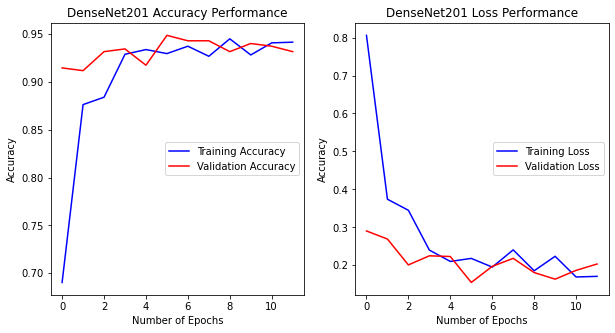

In [ ]:
_, (ax1, ax2) = plt.subplots(nrows = 1, ncols= 2, figsize=(10,5))

base_performance_graph(ax1, EPOCHS, dense201_hist['acc'], 
                       dense201_hist['val_acc'],
                       position = 'center right', 
                       _type= 'Accuracy',
                       model_name = "DenseNet201")

base_performance_graph(ax2, EPOCHS, dense201_hist['loss'],
                       dense201_hist['val_loss'], 
                       position= 'center right',
                       _type= 'Loss',
                       model_name = "DenseNet201")

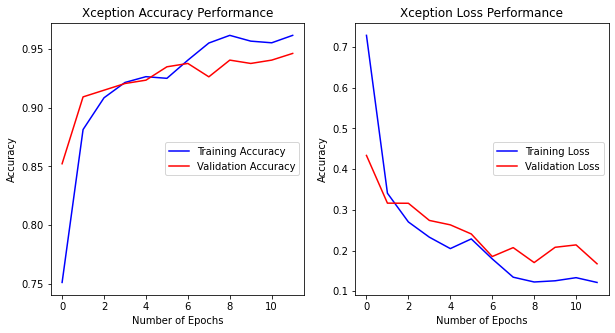

In [ ]:
_, (ax1, ax2) = plt.subplots(nrows = 1, ncols= 2, figsize=(10,5))

base_performance_graph(ax1, EPOCHS, xception_hist['acc'], 
                       xception_hist['val_acc'],
                       position = 'center right', 
                       _type= 'Accuracy',
                       model_name = "Xception")

base_performance_graph(ax2, EPOCHS, xception_hist['loss'],
                       xception_hist['val_loss'], 
                       position= 'center right',
                       _type= 'Loss',
                       model_name = "Xception")

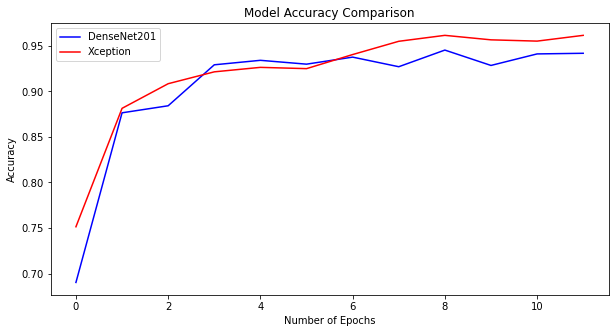

In [ ]:
#Compare the two two models accuracy

_, ax = plt.subplots(figsize=(10,5))

ax.plot(EPOCHS, dense201_hist['acc'], '-b',label = 'DenseNet201')
ax.plot(EPOCHS, xception_hist['acc'], '-r', label = 'Xception')
ax.legend(loc= 'best')
ax.set_title("Model Accuracy Comparison")
ax.set_xlabel('Number of Epochs')
ax.set_ylabel('Accuracy')
plt.savefig('base_model_comparison.png')
plt.show()


Both model obtain similar accuracy of around 94%. This is a huge improvement compared to our original model